In [46]:
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import warnings
warnings.filterwarnings('ignore')   
sns.set(style="whitegrid")


In [48]:
dt = pd.read_csv('AIML Dataset.csv')
dt.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [50]:
dt.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [51]:
dt["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [52]:
dt["isFlaggedFraud"].value_counts() 

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [53]:
dt.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [54]:
dt.shape[0]

6362620

In [55]:
round((dt['isFraud'].value_counts()[1]/dt.shape[0])*100,2)

np.float64(0.13)

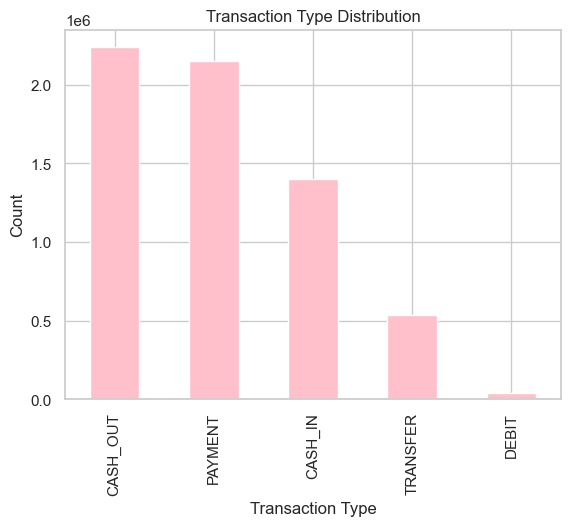

In [56]:
import matplotlib.pyplot as plt

dt["type"].value_counts().plot(kind='bar', title='Transaction Type Distribution', color='pink')
plt.xlabel('Transaction Type')          
plt.ylabel('Count')
plt.show()

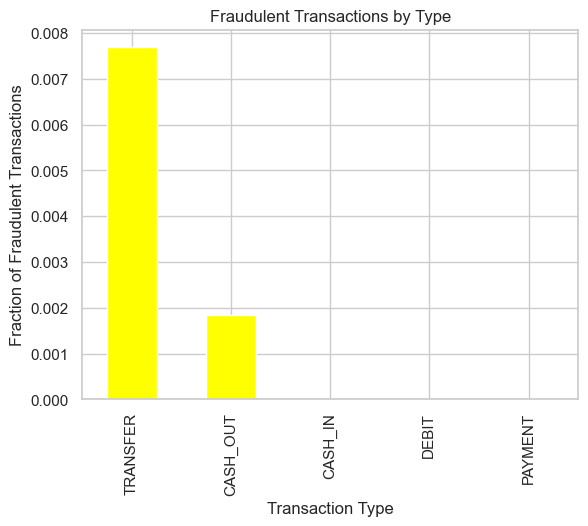

In [57]:
fraud_by_type = dt.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraudulent Transactions by Type', color='yellow')
plt.xlabel('Transaction Type')
plt.ylabel('Fraction of Fraudulent Transactions')
plt.show()

In [58]:
dt["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

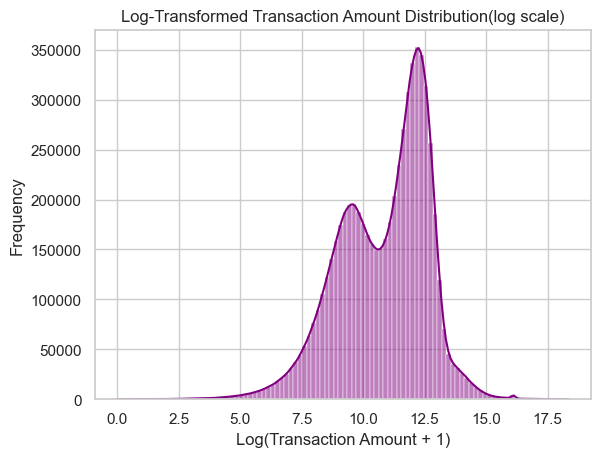

In [59]:
sns.histplot(np.log1p(dt['amount']), bins=100, kde=True, color='purple')
plt.title('Log-Transformed Transaction Amount Distribution(log scale)')
plt.xlabel('Log(Transaction Amount + 1)')
plt.ylabel('Frequency')
plt.show()

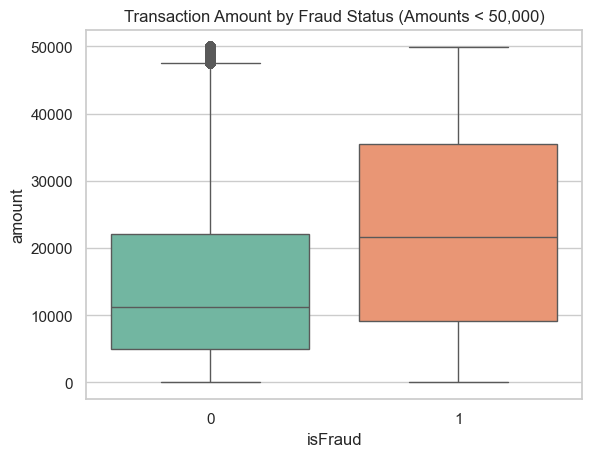

In [60]:
sns.boxplot(data=dt[dt["amount"]<50000], x='isFraud', y='amount', palette='Set2')
plt.title('Transaction Amount by Fraud Status (Amounts < 50,000)')
plt.show()

In [61]:
dt.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [62]:
dt["balanceDiff0rig"] = dt["oldbalanceOrg"] - dt["newbalanceOrig"]
dt["balanceDiffDest"] = dt["newbalanceDest"] - dt["oldbalanceDest"]

In [63]:
(dt["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [64]:
dt.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


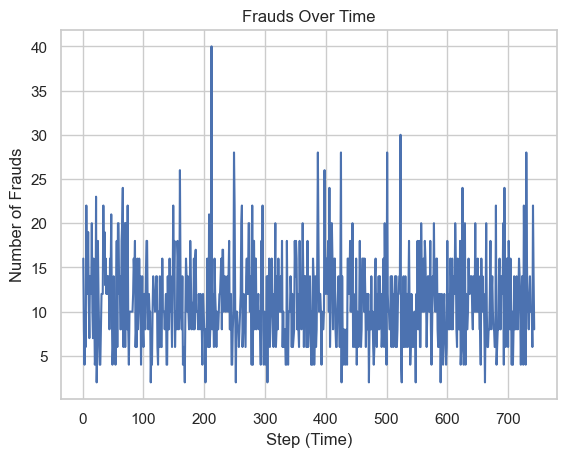

In [65]:
frauds_per_step = dt[dt["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label='frauds_per_step')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Frauds')
plt.title('Frauds Over Time')
plt.grid(True)
plt.show()


In [66]:
dt.drop(columns="step", inplace=True)

In [67]:
if 'dt' not in globals():
	if 'pd' not in globals():
		import pandas as pd
	try:
		dt = pd.read_csv('AIML Dataset.csv')
	except FileNotFoundError:
		raise FileNotFoundError("AIML Dataset.csv not found. Place the file in the notebook working directory.")
dt.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [68]:
top_senders = dt['nameOrig'].value_counts().head(10)

In [69]:
# compute top receivers (most frequent destination accounts) and display
top_receivers = dt['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [70]:
froud_users = dt[dt["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [71]:
# Ensure `froud_users` is defined before trying to display it.
# If it's not defined (e.g., the cell that creates it wasn't run), compute it from `dt`.
try:
	froud_users
except NameError:
	# Load the dataframe if it's not present
	if 'dt' not in globals():
		if 'pd' not in globals():
			import pandas as pd
		try:
			dt = pd.read_csv('AIML Dataset.csv')
		except FileNotFoundError:
			raise FileNotFoundError("AIML Dataset.csv not found. Place the file in the notebook working directory or run the cell that loads the dataset.")
	# Validate required columns
	required_cols = {"isFraud", "nameOrig"}
	if not required_cols.issubset(set(dt.columns)):
		raise KeyError(f"DataFrame 'dt' must contain columns: {required_cols}. Found: {list(dt.columns)}")
	# Compute top fraud-originating users
	froud_users = dt[dt["isFraud"] == 1]["nameOrig"].value_counts().head(10)

froud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [72]:
fraud_type = dt[dt["type"].isin(['TRANSFER', 'CASH_OUT'])] 

In [73]:
# Use the existing `fraud_type` DataFrame (created in a previous cell)
fraud_type["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

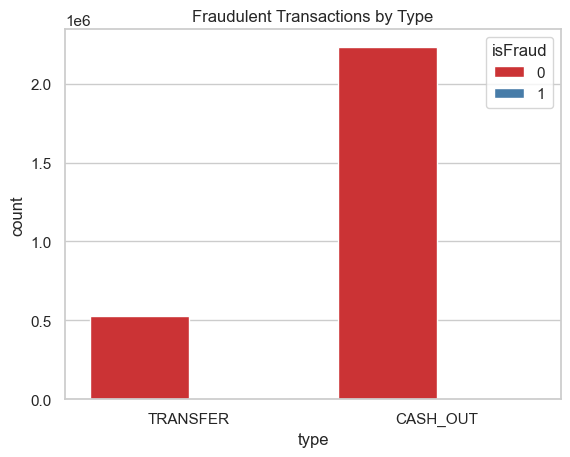

In [74]:
# Ensure seaborn and matplotlib are available in this kernel (avoid duplicate imports)
if 'sns' not in globals():
	import seaborn as sns
if 'plt' not in globals():
	import matplotlib.pyplot as plt

# Plot using the existing `fraud_type` DataFrame
sns.countplot(data=fraud_type, x='type', hue='isFraud', palette='Set1')
plt.title('Fraudulent Transactions by Type')
plt.show()

In [75]:
corr = dt[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


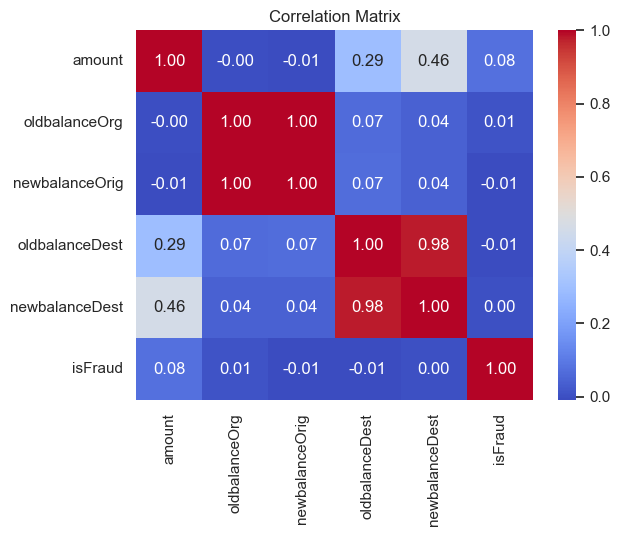

In [76]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [77]:
zero_after_transfer = dt[(dt["type"]=="TRANSFER") & (dt["newbalanceDest"]==0) & (dt["isFraud"]==1)]
zero_after_transfer.shape[0]

4068

In [78]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0,181.00,0.0
251,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0,2806.00,0.0
680,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0,20128.00,0.0
969,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0,1277212.77,0.0
1115,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0,35063.63,0.0


In [79]:
dt["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [80]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
dt.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [82]:
dt_model = dt.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)
dt_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [83]:
categorial = ['type']
numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceDiff0rig', 'balanceDiffDest']

In [84]:
y = dt_model["isFraud"]
X = dt_model.drop(columns=["isFraud"], axis=1)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)   


In [86]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop="first"), categorial)
    ],
    remainder= "drop")

In [87]:
Pipeline=Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [88]:
for df in (x_train, x_test):
    if 'balanceDiff0rig' not in df.columns:
        df['balanceDiff0rig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
    if 'balanceDiffDest' not in df.columns:
        df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Now fit the pipeline
Pipeline.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [89]:
y_preds = Pipeline.predict(x_test)



In [90]:
# Use the predictions already computed (variable name `y_preds`) and print the classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [91]:
# use the predictions variable computed earlier (`y_preds`)
confusion_matrix(y_test,y_preds)

array([[1804335,  101987],
       [    130,    2334]])

In [92]:
Pipeline.score(x_test, y_test)*100

94.65015983981442

In [93]:
import joblib
joblib.dump(Pipeline, 'fraud_detection_model.pkl')  

['fraud_detection_model.pkl']